In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# LOAD THE DATA

In [56]:
train = pd.read_csv('./data/train.csv')
train.head(5)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
test = pd.read_csv('./data/test.csv')
test.head(1)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


# EDA TRAIN

In [4]:
train.shape

(10506, 12)

In [5]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [6]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Block,10506.0,35.687797,24.339468,10.000000,12.000000,33.000000,52.000000,98.000000
Latitude,10506.0,41.841139,0.112742,41.644612,41.732984,41.846283,41.954690,42.017430
Longitude,10506.0,-87.699908,0.096514,-87.930995,-87.760070,-87.694991,-87.627796,-87.531635
AddressAccuracy,10506.0,7.819532,1.452921,3.000000,8.000000,8.000000,9.000000,9.000000
NumMosquitos,10506.0,12.853512,16.133816,1.000000,2.000000,5.000000,17.000000,50.000000
WnvPresent,10506.0,0.052446,0.222936,0.000000,0.000000,0.000000,0.000000,1.000000


In [8]:
# Date needs to be set as datetime
train['Date'] = pd.to_datetime(train['Date'], infer_datetime_format=True)

In [9]:
# Transforming object features to categorical features
train['Address'] = train['Address'].astype('category')
train['Species'] = train['Species'].astype('category')
train['Street']  = train['Street'].astype('category')
train['Trap']    = train['Trap'].astype('category')
train['AddressNumberAndStreet'] = train['AddressNumberAndStreet'].astype('category')

In [10]:
train.dtypes

Date                      datetime64[ns]
Address                         category
Species                         category
Block                              int64
Street                          category
Trap                            category
AddressNumberAndStreet          category
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [11]:
#Index of data train
train.index

RangeIndex(start=0, stop=10506, step=1)

In [12]:
#Reducing name of Species
train['Species'] = train['Species'].str.replace('CULEX ', '')
train['Species'].value_counts()

PIPIENS/RESTUANS    4752
RESTUANS            2740
PIPIENS             2699
TERRITANS            222
SALINARIUS            86
TARSALIS               6
ERRATICUS              1
Name: Species, dtype: int64

In [13]:
#Checking for the balance of data on WnvPresent
train['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

In [14]:
#Number of duplicates
train.duplicated(subset=None, keep='first').sum()

813

In [15]:
# Creating new column for year and month
train['Day'] = train['Date'].dt.dayofyear
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year

In [16]:
train['Year'].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: Year, dtype: int64

In [17]:
train['Month'].value_counts()

8     3751
7     2606
9     2218
6     1571
10     276
5       84
Name: Month, dtype: int64

## Train Graphs

Text(0,0.5,'Average Number of Mosquitos in Trap')

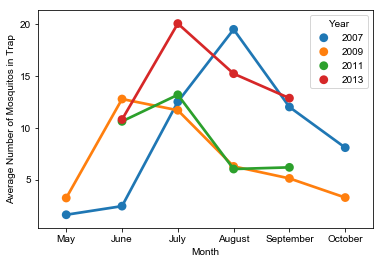

In [18]:
#Average Number of Mosquitos in Trap per Month and Year
_ = sns.pointplot(x='Month', y="NumMosquitos", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['NumMosquitos'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
sns.set(font_scale=1.5, rc={'figure.figsize':(10, 10)}, palette="Blues_d")
plt.ylabel('Average Number of Mosquitos in Trap')

Text(0,0.5,'Average Cases of WNV in Trap')

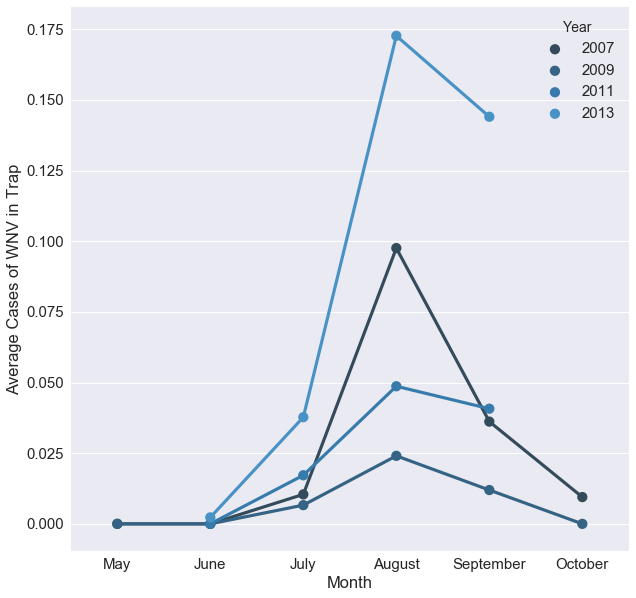

In [19]:
#Aveage number of positive cases of WNV  in trap per month and year
_ = sns.pointplot(x='Month', y="WnvPresent", hue="Year", data=train.groupby(['Year', 'Month'], as_index=False)['WnvPresent'].mean(),)
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
sns.set(font_scale=1.5, rc={'figure.figsize':(8, 8)}, palette="Blues_d")
plt.ylabel('Average Cases of WNV in Trap')

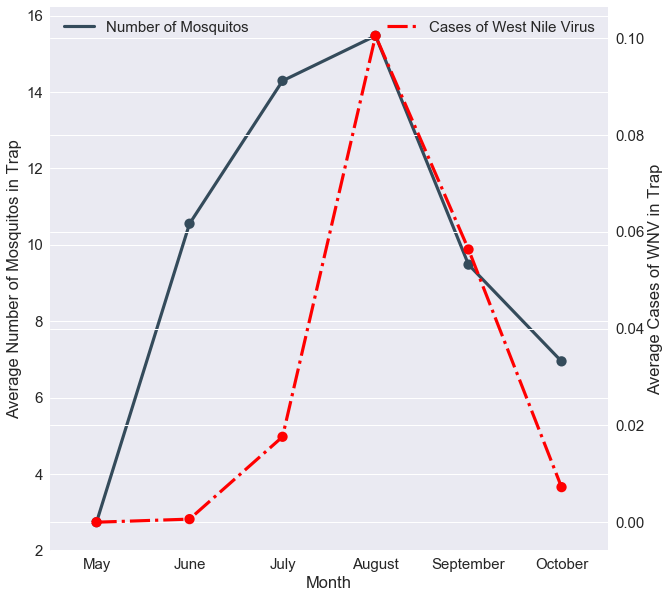

In [20]:
#Number of mosquitos in trap vs. % of cases of WNV
sns.set(font_scale=1.5, rc={'figure.figsize':(10, 10)}, palette="Blues_d")
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.pointplot(x='Month', y="NumMosquitos", data=train.groupby(['Month'], as_index=False)['NumMosquitos'].mean(),)
plt.ylabel('Average Number of Mosquitos in Trap')
plt.legend(['Number of Mosquitos'], loc=2)
ax2 = ax1.twinx()
ax2 = sns.pointplot(x='Month', y="WnvPresent", linestyles='-.', color='r', data=train.groupby(['Month'], as_index=False)['WnvPresent'].mean(),)
ax1.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Cases of WNV in Trap')
plt.legend(['Cases of West Nile Virus'], loc=1);

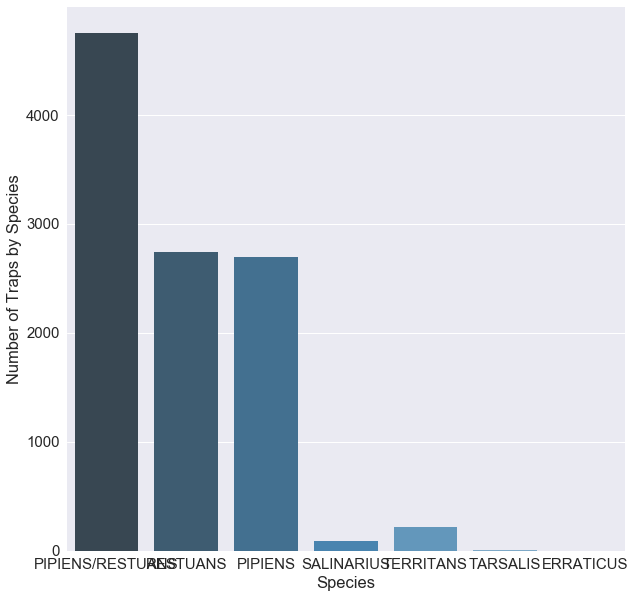

In [21]:
#Number of Traps by Species 
sns.countplot(x='Species', data=train, palette="Blues_d")
sns.set(font_scale=1, rc={'figure.figsize':(10, 10)}, palette="Blues_d")
plt.xticks(rotation=0)
plt.ylabel('Number of Traps by Species')
plt.show()

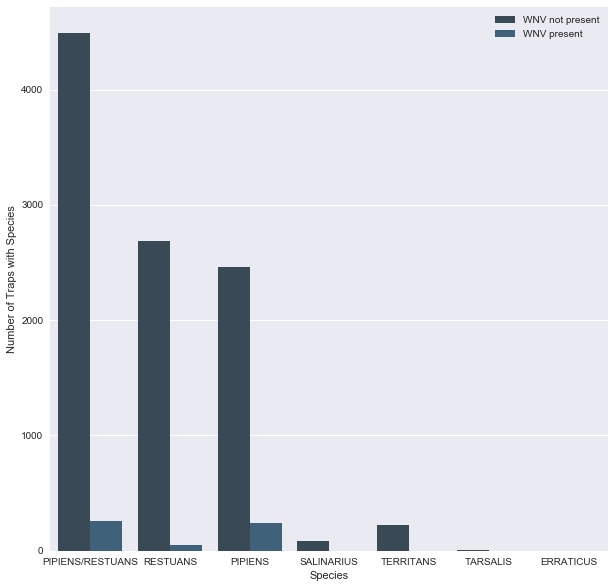

In [22]:
#Prescence of WNV by Species of Mosquitos
sns.countplot(x='Species', hue='WnvPresent', data=train)
sns.set(font_scale=1, rc={'figure.figsize':(8, 8)}, palette="Blues_d")
plt.xticks(rotation=0)
plt.legend(['WNV not present', 'WNV present'], loc=1)
plt.ylabel('Number of Traps with Species')
plt.show()

Text(0,0.5,'Average Number of Mosquitos in Trap')

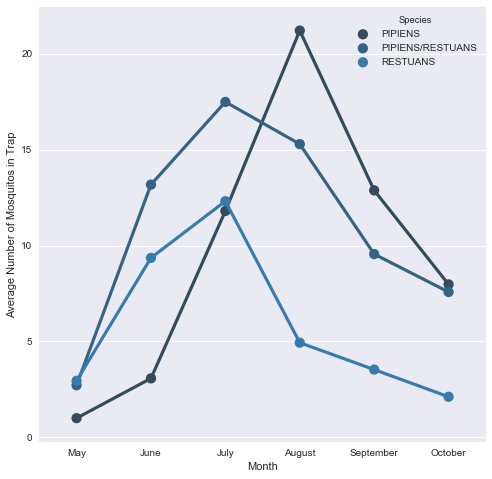

In [23]:
#Average number of Mosquitos in Trap per month per species
_ = sns.pointplot(x='Month', y='NumMosquitos', hue='Species', data=train[train['Species'].isin(['PIPIENS', 'PIPIENS/RESTUANS', 'RESTUANS'])].groupby(['Month', 'Species'], as_index=False)['NumMosquitos'].mean(),)
sns.set(font_scale=1.5, rc={'figure.figsize':(10, 10)}, palette="Blues_d")
_.set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
plt.ylabel('Average Number of Mosquitos in Trap')


In [24]:
z = train[train['WnvPresent']==1]

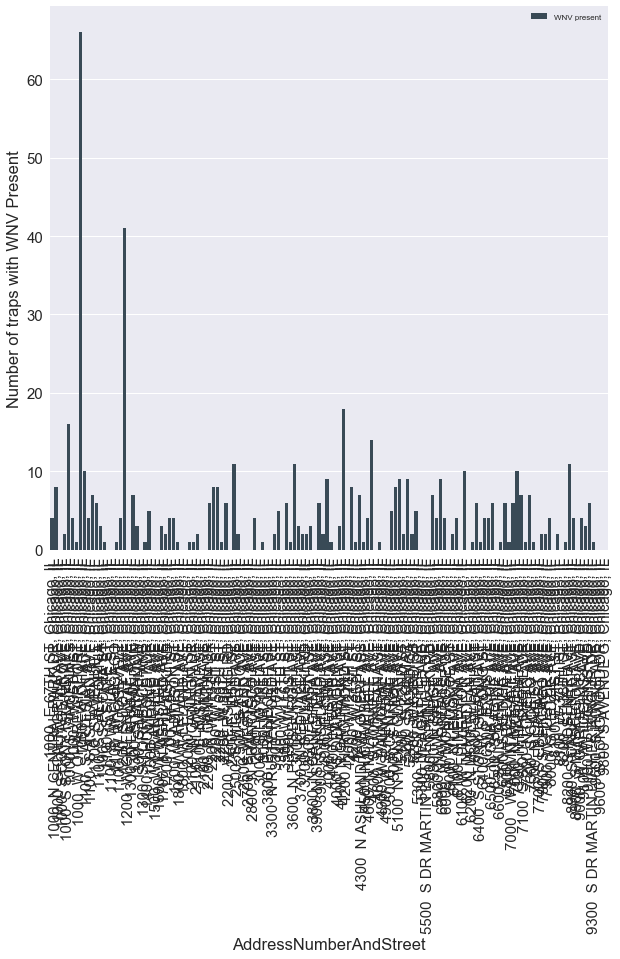

In [25]:
#Prescence of WNV by Location
sns.countplot(x='AddressNumberAndStreet', hue='WnvPresent', data=z)
sns.set(font_scale=0.8, rc={'figure.figsize':(12, 12)}, palette="Blues_d")
plt.xticks(rotation=90)
plt.legend(['WNV present'], loc=1)
plt.ylabel('Number of traps with WNV Present')
plt.show()

In [26]:
len(train['AddressNumberAndStreet'].value_counts())

138

In [27]:
Wnv_location = train.groupby(['AddressNumberAndStreet' ,'WnvPresent', 'Latitude', 'Longitude'], as_index=False)['NumMosquitos'].sum().sort_values('NumMosquitos', ascending=False)
Wnv_location.head(1)

,AddressNumberAndStreet,WnvPresent,Latitude,Longitude,NumMosquitos
686118,"1200 S DOTY AVE, Chicago, IL",0,41.673408,-87.599862,19790.0


In [28]:
Wnv_location_pos = Wnv_location[Wnv_location.WnvPresent==1]

In [29]:
Wnv_location_pos.head()

,AddressNumberAndStreet,WnvPresent,Latitude,Longitude,NumMosquitos
302083,"1000 W OHARE AIRPORT, Chicago, IL",1,41.974689,-87.890615,2060.0
705162,"1200 S DOTY AVE, Chicago, IL",1,41.673408,-87.599862,1878.0
174281,"1000 S STONY ISLAND AVE, Chicago, IL",1,41.726465,-87.585413,759.0
2776155,"4100 N OAK PARK AVE, Chicago, IL",1,41.954690,-87.800991,500.0
1734787,"2400 E 105TH ST, Chicago, IL",1,41.704572,-87.565666,482.0


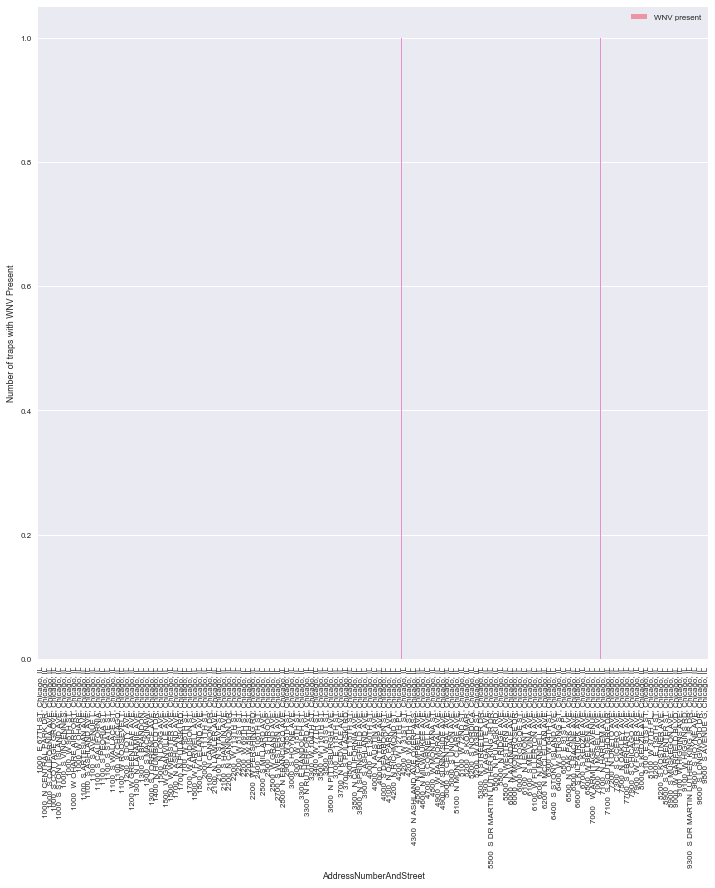

In [30]:
#Prescence of WNV by Location
sns.countplot(x='AddressNumberAndStreet', hue='NumMosquitos', data=Wnv_location_pos)
sns.set(font_scale=0.8, rc={'figure.figsize':(12, 12)}, palette="Blues_d")
plt.xticks(rotation=90)
plt.legend(['WNV present'], loc=1)
plt.ylabel('Number of traps with WNV Present')
plt.show()

Observations:

- Address seems irelevant, since we have latitute and logitude.  This 
  feature can be dropped.
- Almost 95% of WNV is 0, meaning that WNV is not present.  We will 
  need to stratify our training data to avoid a higher presence of 0 
  in our results.
- Species have 7 categories, so we will need to create dummies
- The training set has 813 duplicate rows.  Since observations are 
  capped at 50 mosquitos, it is possible that a single observation   
  includes a couple of records. We will leave the   duplicates for 
  this reason, and add up the number of mosquitos with a groupby.


# EDA TEST

In [31]:
test.shape

(116293, 11)

In [32]:
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [33]:
test.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [34]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,116293.0,58147.000000,33571.041765,1.000000,29074.000000,58147.000000,87220.000000,116293.000000
Block,116293.0,41.131100,24.864726,10.000000,18.000000,39.000000,61.000000,98.000000
Latitude,116293.0,41.849389,0.106593,41.644612,41.753411,41.862292,41.951866,42.017430
Longitude,116293.0,-87.693658,0.080699,-87.930995,-87.750938,-87.694991,-87.648860,-87.531635
AddressAccuracy,116293.0,7.954357,1.252733,3.000000,8.000000,8.000000,9.000000,9.000000


In [35]:
# Date needs to be set as datetime
test['Date'] = pd.to_datetime(test['Date'], infer_datetime_format=True)

In [36]:
# Transforming object features to categorical features
test['Address'] = test['Address'].astype('category')
test['Species'] = test['Species'].astype('category')
test['Street']  = test['Street'].astype('category')
test['Trap']    = test['Trap'].astype('category')
test['AddressNumberAndStreet'] = test['AddressNumberAndStreet'].astype('category')

In [37]:
test.dtypes

Id                                 int64
Date                      datetime64[ns]
Address                         category
Species                         category
Block                              int64
Street                          category
Trap                            category
AddressNumberAndStreet          category
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
dtype: object

In [38]:
#Index of data train
test.index

RangeIndex(start=0, stop=116293, step=1)

In [39]:
#Reducing name of Species
test['Species'] = test['Species'].str.replace('CULEX ', '')
test['Species'].value_counts()

PIPIENS/RESTUANS     15359
RESTUANS             14670
PIPIENS              14521
SALINARIUS           14355
TERRITANS            14351
TARSALIS             14347
UNSPECIFIED CULEX    14345
ERRATICUS            14345
Name: Species, dtype: int64

In [40]:
#Number of duplicates
test.duplicated(subset=None, keep='first').sum()

0

In [41]:
# Creating new column for year and month
test['Day'] = train['Date'].dt.dayofyear
test['Month'] = train['Date'].dt.month
test['Year'] = train['Date'].dt.year

In [42]:
test['Year'].value_counts()

2007.0    3811
2013.0    2392
2009.0    2249
2011.0    2054
Name: Year, dtype: int64

In [43]:
test['Month'].value_counts()

8.0     3751
7.0     2606
9.0     2218
6.0     1571
10.0     276
5.0       84
Name: Month, dtype: int64

## Test Graphs

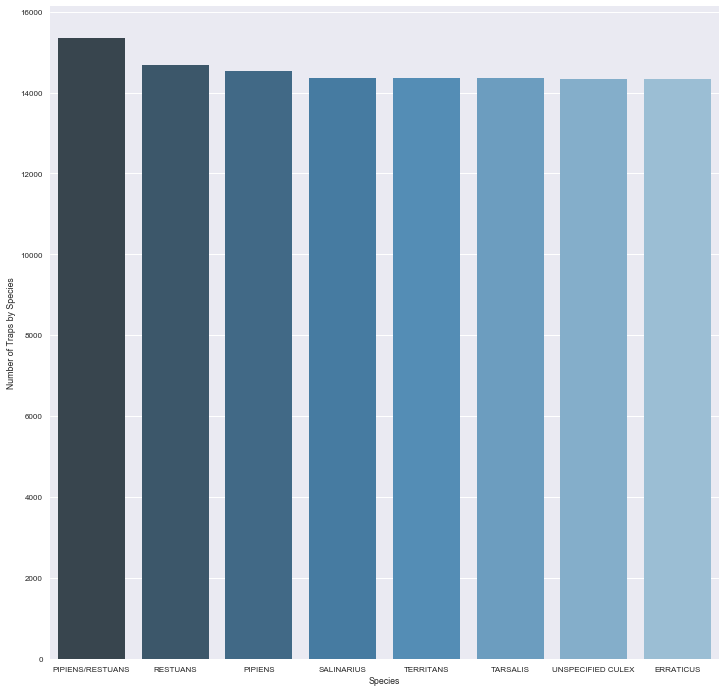

In [44]:
#Number of Traps by Species 
sns.countplot(x='Species', data=test, palette="Blues_d")
sns.set(font_scale=0.5, rc={'figure.figsize':(10, 10)}, palette="Blues_d")
plt.xticks(rotation=0)
plt.ylabel('Number of Traps by Species')
plt.show()

Observations:
- Comparing the test with our train distribution of traps by species
  we can see that our test data includes relatively uniform  
  observations of each subspecies plus an unknown specie.
- We will have to homogenize the species categories for train and 
  test.
- We also noticed that the test data does not have the column 
  NumMosquitos.

# FEATURE ENGINEERING TRAIN

In [45]:
#Homogenizing the categories of Species on train 
train_spec_val = sorted(list(train['Species'].unique()))
test_spec_val = sorted(list(test['Species'].unique()))
spec_val_categories = set(train_spec_val + test_spec_val ) 

train['Species'] = pd.Categorical(train['Species'], categories = spec_val_categories)

In [46]:
#getting dummies for train_trap
train = pd.get_dummies(train, columns=['Species'])

In [47]:
#dropping duplicates from trai_trap
train.drop_duplicates(inplace=True)

In [44]:
#save csv with Num of Mosquitos
#train.to_csv('EDA_TRAIN_MOSQ.csv')

In [45]:
#dropping number of mosquitos because it is not in test set
#train.drop('NumMosquitos', axis=1, inplace=True)

In [48]:
#train_trap.shape
train.shape

(9693, 22)

In [49]:
train.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Month,Year,Species_ERRATICUS,Species_SALINARIUS,Species_UNSPECIFIED CULEX,Species_PIPIENS/RESTUANS,Species_TERRITANS,Species_RESTUANS,Species_PIPIENS,Species_TARSALIS
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,...,5,2007,0,0,0,1,0,0,0,0


In [53]:
train.to_csv('EDA_TRAIN.csv')

# FEATURE ENGINEERING TEST

In [50]:
#Homogenizing the categories of Species on test
test['Species'] = pd.Categorical(test['Species'], categories = spec_val_categories)

In [51]:
#getting dummies for test
test = pd.get_dummies(test, columns=['Species'])

In [52]:
#test.shape.  Only difference between train trap and test is columns WnvPresent
test.shape

(116293, 21)

In [54]:
test.to_csv('EDA_TEST.csv')